<a href="https://colab.research.google.com/github/yogoohuang/GPT-Linebot-python-flask-on-vercel/blob/master/%E3%80%8CAI%E6%95%99%E6%9D%90_%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92_%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

※ 搭配與AI做朋友實作教材料第3章 監督式學習  
https://docs.google.com/document/d/1tBDFArZqQHt5sg-BoQShMwVQV0ZDm071/edit?usp=sharing&ouid=113499339209739111524&rtpof=true&sd=true

PS:  
colab numpy與webcam 影像處理基礎：
https://colab.research.google.com/drive/1WUlLJkMW493Usn9bS7OgmOZt0YWVbSYq?usp=sharing



#Step1. 安裝必要套件

In [ ]:
!pip install pyFaceTrace

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyFaceTrace: filename=pyFaceTrace-5.0.5-py3-none-any.whl size=16052 sha256=229c01ede53003b3942421d45627d65d6a71d700e385f838d7f63b66df1690e9
  Stored in directory: /root/.cache/pip/wheels/88/1f/06/2e5e65885daa1b29504283ccfe2855c6e5d41f700731a5398d
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6868 sha256=189f3b966b424aeef7f33e8da40820960124f476a2876709e9a3d8d1f2202bfb
  Stored in directory: /root/.cache/pip/wheels/69/ee/f7/6fccd10cb65421ba2da64fa6caf8ee7fbae0059884af8c8587
Successfully built pyFaceTrace bz2file


In [ ]:
!pip install dlib

In [ ]:
!pip install colabcam

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 45.3 MB/s eta 0:00:00
  Created wheel for colabcam: filename=colabcam-1.0.3-py3-none-any.whl size=5488 sha256=2b912edc6b7e0ca1c24682b6d58ab76068c7d4f852053b6f5618a0ce2297ebcb
  Stored in directory: /root/.cache/pip/wheels/5a/ec/08/a87ee87cbf9c5d825e3433eb730e708d708e02158cd56f9606
Successfully built colabcam


# Step2. 引用 pyFaceTrace 同時下載必要檔案:
## - shape_predictor_68_face_landmarks.dat : 人臉68特徵點偵測模型(取得人臉位置)
## - dlib_face_recognition_resnet_model_v1.dat : 人臉特徵擷取模型(人臉辨識)
## - kaiu.ttf : 中文字型檔(標楷體)

In [ ]:
#如果所需檔案已存在，就不用再下載
import pyFaceTrace as ft

載入shape_predictor_68_face_landmarks.dat...可能需要一點時間
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................ok
載入dlib_face_recognition_resnet_model_v1.dat...可能需要一點時間
....................................................................................................................................................................ok
載入kaiu.ttf...可能需要一點時間
........................................

RuntimeError: ignored

In [ ]:
#下載人臉範例檔並解壓縮至 train資料夾 (使用者可自行丟欲辨識的人圖片至train資料夾)
ft.downloadImageSamples()

### 每張人臉都可以萃取出128維的特徵向量(by人臉特徵擷取之演算法)

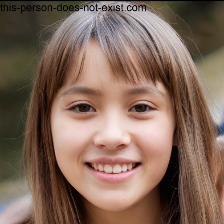

特徵向量
[-9.11070928e-02  9.70986784e-02 -3.00651044e-02 -1.60953015e-01
 -1.52775556e-01  4.07607108e-03 -9.13216621e-02 -8.48986506e-02
  2.34153196e-01 -1.76502556e-01  2.37803921e-01 -8.28557536e-02
 -2.47006699e-01  2.44911164e-02 -6.98361844e-02  2.43036374e-01
 -2.11812481e-01 -1.24726966e-01 -1.28188804e-02  2.07910761e-02
  6.58998489e-02  4.13739160e-02 -2.97682136e-02  5.17654121e-02
 -5.31995967e-02 -4.07753944e-01 -1.50999606e-01 -6.75597563e-02
 -7.77664632e-02 -5.91042340e-02  2.28979588e-02  4.45129722e-03
 -1.77675873e-01 -2.94931307e-02  3.43471169e-02  8.32680911e-02
 -1.36395991e-02 -1.23014525e-01  1.55227065e-01  2.98327170e-02
 -2.42656097e-01  3.74083519e-02  1.13680422e-01  2.46102750e-01
  1.03715330e-01  3.73278037e-02 -1.16290841e-02 -1.72980905e-01
  1.47647053e-01 -1.75991431e-01  4.83854823e-02  7.84172788e-02
  4.94724549e-02  6.13908470e-02  2.59219408e-02 -1.23016752e-01
  8.20896029e-02  1.66768923e-01 -2.17609957e-01  1.80558115e-03
  1.23602197e-01 -4.

In [ ]:
#印出對應人臉圖檔(ex: 亞女1.jpg)的128維人臉特徵向量
import cv2
from google.colab.patches import cv2_imshow
im=cv2.imread('train/亞女1.jpg')
imShow = cv2.resize(im,(224,224))
cv2_imshow(imShow)
fv = ft.getFeatureVector(im)
print('特徵向量')
print(fv)

Note: 決定待測圖片為哪一張人臉時採用「最短距離分類器」並採取下列策略：直接由人臉矩形區域取得人臉68個特徵點之位置後， 再由此68個特徵點輔助產出的128維人臉特徵向量，用此特徵向量和資料庫中之人臉特徵向量做比對，由資料庫取距離最近的特徵向量當作辨識結果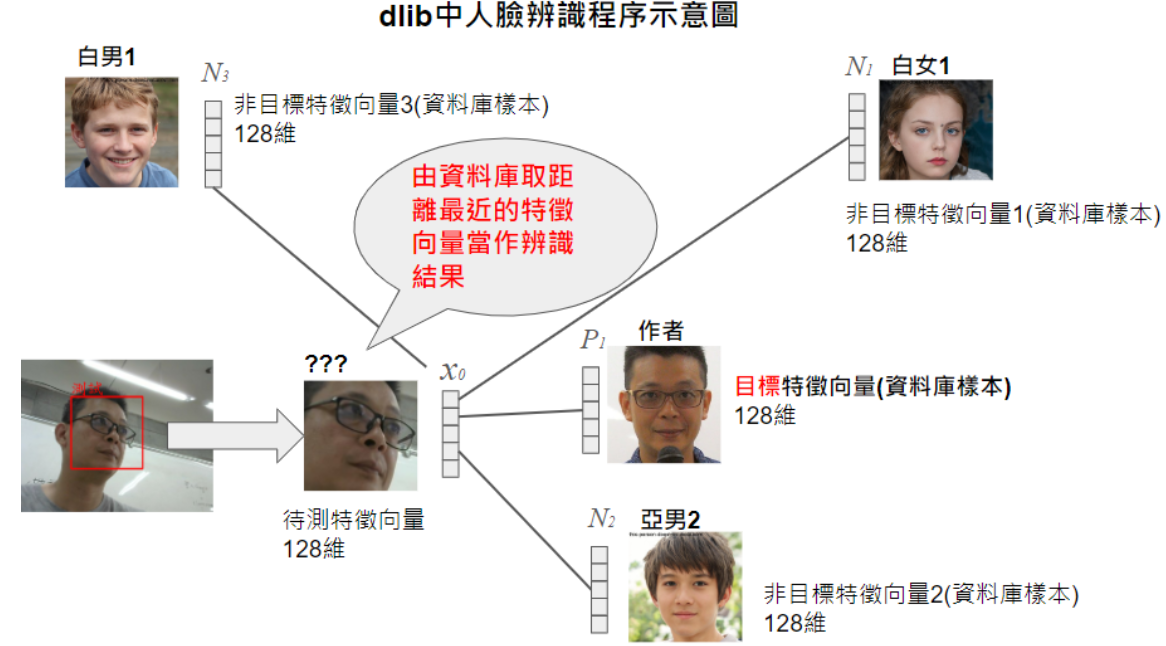

# Step3. 由webcam 擷取單一影像做測試(按下「capture」)

<IPython.core.display.Javascript object>

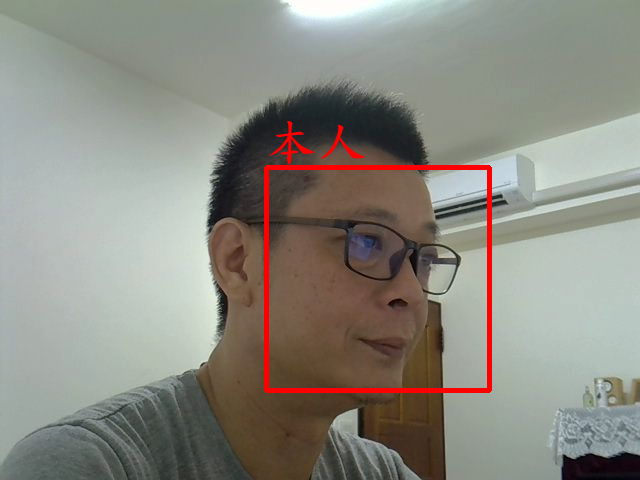

In [ ]:
import colabcam #引入colab 中webcam控制工具
import numpy as np
from PIL import ImageFont
from google.colab.patches import cv2_imshow
import cv2
#引入colab中秀圖函式
from google.colab.patches import cv2_imshow
img=colabcam.take_img()
#將本張人臉儲存於colab ./train資料夾中
FACE_ID="本人"
cv2.imwrite(f"./train/{FACE_ID}.jpg",img)
#設定文字物件
FONT = ImageFont.truetype("kaiu.ttf",50,index=0)
#取得人臉位置
rect=ft.detector(img,1)[0]
#將人臉矩形框畫在img上
cv2.rectangle(img,(rect.left(),rect.top()),
  (rect.right(),rect.bottom()),(0,0,255),3)
#img上加入文字
img=ft.addText2Img_cv2(img,"本人",FONT,position=(rect.left(),
            rect.top()-FONT.size-1))
#於colab中秀出img
cv2_imshow(img)


# Step4. 載入train資料夾中人臉圖片的特徵向量並儲入比對資料庫ft.DB中  
## -想辨識的相片可直接放入 train 資料夾

In [ ]:
#至train資料夾載入樣本,欲辨識之目標圖片可放入 train資料夾
ft.loadDB(folder='train')
ft.DB.keys()

亞女2.jpg feature loaded
白男1.jpg feature loaded
亞男1.jpg feature loaded
李國源.jpg feature loaded
白女2.jpg feature loaded
亞男2.jpg feature loaded
白女1.jpg feature loaded
本人.jpg feature loaded
長髮哥.png feature loaded
白男2.jpg feature loaded
亞女1.jpg feature loaded


dict_keys(['亞女2', '白男1', '亞男1', '李國源', '白女2', '亞男2', '白女1', '本人', '長髮哥', '白男2', '亞女1'])

# Step5. 搭配 javascript webcam stream 取得webcam影像並即時辨識

In [ ]:
# import necessary modules
import pyFaceTrace as ft
from PIL import ImageFont
import colabcam # import webcam control tool for Colab
import numpy as np
import cv2
# 啟動JavaScript之webcam資料串流
colabcam.video_stream()
label_html = '顯示中...(點擊畫面以結束顯示)'
#設定文字物件
FONT = ImageFont.truetype("kaiu.ttf",30,index=0)
# 初始化矩形區域(bounding box)
bbox = ''
while True:
  # 藉由JavaScript取得webcam資料
  js_reply = colabcam.video_frame(label_html, bbox)
  if not js_reply:break
  # 由JavaScript回應之webcam資料轉換為 OpenCV image
  img = colabcam.js_to_image(js_reply["img"])
  frame_height, frame_width = np.shape(img)[0:2]#取得img長寬
  #取得 img 中所有人臉之矩型區域，放入rects
  rects=ft.detector(img,1)
  #建立透明疊加影像物件 overlapImg
  overlapImg = np.zeros([frame_height,frame_width,4],
                        dtype=np.uint8)
  #取得 img 中所有人臉之矩型區域，放入rects
  rects = ft.detector(img, 1)
  for rect in rects:
    #取得人臉矩形區域之左上角座標(x,y)，及寬長(w,h)
    x,y,w,h=rect.left(),rect.top(),rect.width(),rect.height()
    #將人臉矩形框畫在 overlapImg 上
    cv2.rectangle(overlapImg, (x, y), (x+w, y+h), (255,0,0),2)
    #取得人臉128維特徵向量 fv
    fv = ft.getFeatureVector(img, rect)
    #將特徵向量和 ft.DB 中之人特徵向量做比對，
    #找到距離最短的(dist)當作辨識結果(tag)
    tag, dist = ft.predictFromDB(fv)
    dist = round(dist, 4)
    #將辨識結果之文字顯示在 overlapImg 上
    textImg = ft.addText2Img_cv2(overlapImg,f"{tag},dist={dist}",
                FONT,(x,y-FONT.size-1),fill=(0,0,255))
    overlapImg = np.zeros([frame_height,frame_width,4],dtype=np.uint8)
    overlapImg[:,:,:3] = textImg
  # 將 overlapImg 編碼後重疊顯示至 webcam 串流顯示區域
  bbox = colabcam.cvImg2bbox(overlapImg)


<IPython.core.display.Javascript object>

# **KNN分類器辨識性別示範**

### 準備訓練資料

In [ ]:
import os
import numpy as np
X_train = []
Y_train = []
for f in os.listdir('train'):
  if f == '.ipynb_checkpoints':continue
  im=cv2.imread(f'train/{f}')
  fv = ft.getFeatureVector(im)
  print(f)
  if '女' in f:
    X_train.append(fv)
    #檔名裡面有'女'字就標記為 0
    Y_train.append(0)
  elif '男' in f:
    X_train.append(fv)
    #檔名裡面有'男'字就標記為 1
    Y_train.append(1)

#轉換為 numpy array 方便運算
X_train = np.array(X_train)
Y_train = np.array(Y_train)

亞女2.jpg
白男1.jpg
亞男1.jpg
李國源.jpg
白女2.jpg
亞男2.jpg
白女1.jpg
白男2.jpg
亞女1.jpg


### 利用 X_train , Y_train 開始訓練 KNN 模型

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#初始化 knn 物件，設定 K=3
knn = KNeighborsClassifier(n_neighbors=3)
#模型訓練
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

### 針對訓練資料 X_train 先做一次內部測試(inside testing)

In [ ]:
#印出辨識出來類別序列
print(knn.predict(X_train))
#印出正確答案類別序列
print(Y_train)

[0 1 1 0 1 0 1 0]
[0 1 1 0 1 0 1 0]


### 取訓練資料中沒有的圖檔進行分類測試

In [ ]:
im=cv2.imread(f'train/李國源.jpg')
fv = ft.getFeatureVector(im)
print('辨識結果(女:0 ,男:1) ',knn.predict([fv,fv]))
print('(女生機率,男生機率)=',knn.predict_proba([fv,fv]))

辨識結果(女:0 ,男:1)  [1 1]
(女生機率,男生機率)= [[0.33333333 0.66666667]
 [0.33333333 0.66666667]]


In [ ]:
im=cv2.imread(f'train/李國源.jpg')
np.shape(im)

(494, 346, 3)

### 將所有圖片顯示在二維空間中

##### 準備欲顯示的圖片及對應的特徵向量

In [ ]:
import os
import numpy as np
img_show = [] #欲於二維空間展示的多張小圖
X_show = []  #img_show中的小圖所對應的128維特徵向量
for f in os.listdir('train'):
  if f == '.ipynb_checkpoints':continue
  im=cv2.imread(f'train/{f}')
  #取得人臉rect
  [rect] = ft.getFaceRects(im)
  #擷取人臉部分放入 faceClip
  faceClip = im[rect.top():rect.bottom(),rect.left():rect.right()]
  #faceClip縮小至 50x50 像素，方便顯示
  faceClip = cv2.resize(faceClip,(50,50),interpolation=cv2.INTER_AREA)
  #放入 img_show 中等待顯示
  img_show.append(faceClip)
  #取得人臉特徵向量fv
  fv = ft.getFeatureVector(im,rect)
  #faceClip 所對應的二維特徵向量於入 X_show 中
  X_show.append(fv)

###### 為方便能於二維平面上展示結果將128維特徵向量使用 PCA 降維至2維

In [ ]:
#一個人臉的特徵為128維，為方便能於二維平面上展示結果
#先將128維特徵向量使用 PCA 降維至2維
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = np.array(X_show)#,dtype=np.float32
pca.fit(X)
# PCA 轉換結果放入 X_pca
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (12, 128)
transformed shape: (12, 2)


##### 把人臉直接貼到二維座標上做顯示

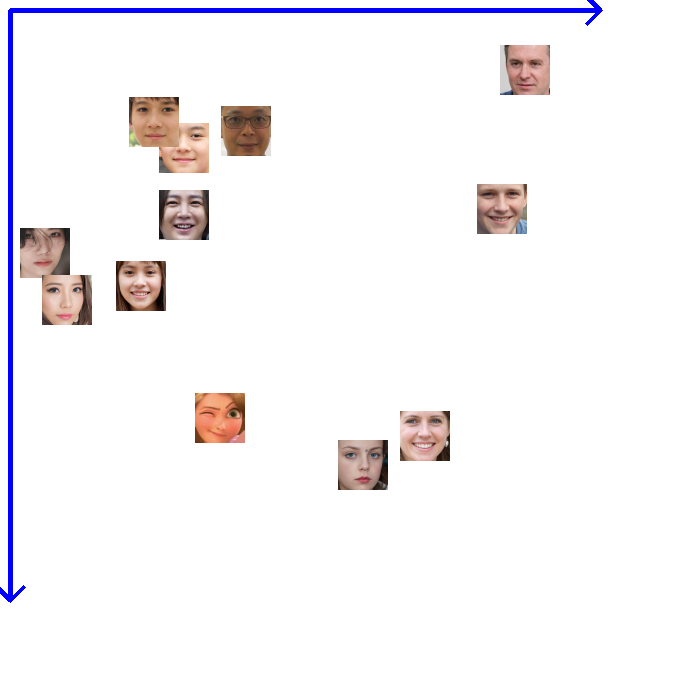

In [ ]:
#把人臉直接貼到二維座標上做顯示
# Note:原點位於左上角，Y軸方向由上至下
shape = (700, 700, 3) # y, x, RGB
back_img = np.full(shape, 255).astype(np.uint8)
#把 X_pca 座標值先做正規化到20到500之間，避免貼圖錯誤
X_pca_normalized = cv2.normalize(X_pca,None,20,500,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
for i in range(len(img_show)):
  im = img_show[i]
  H,W,b=im.shape
  X,Y = X_pca_normalized[i]
  X=int(X) ; Y=int(Y)
  np.copyto(back_img[Y:Y+H,X:X+W],im)
#畫出座標軸
cv2.arrowedLine(back_img,(10,10),(600,10),color=(255,0,0),thickness=3,tipLength=0.03)
cv2.arrowedLine(back_img,(10,10),(10,600),color=(255,0,0),thickness=3,tipLength=0.03)
#秀出結果
cv2_imshow(back_img)

8